# Banknote Authentication

Square grayscale images of genuine and forged banknotes were passed into the Wavelet Transform function to extract the features.

## Attributes

**Features**

*float* `variance`: the variance of the Wavelet-Transformed image  
*float* `skewness`: the skewness of the Wavelet-Transformed image  
*float* `kurtosis`: the kurtosis of the Wavelet-Transformed image  
*float* `entropy`: the entropy of the image  

**Labels**

*bool* `label`: whether the banknote is genuine or was forged  

## Setup

Import the libraries and functions to be used.

In [1]:
%reset -f
import pandas as pd
import numpy as np
import seaborn as sns

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

## Loading the data set

Read the CSV file into `df` and shuffle the rows.

In [6]:
df = pd.read_csv('banknote_authentication.csv')
df = df.reindex(np.random.permutation(df.index))
feature_names = list(set(df.columns) - set('label'))
df.head(5)

,variance,skewness,kurtosis,entropy,label
904,0.50225,0.65388,-1.17930,0.39998,1
1335,-1.56810,-7.24460,6.55370,-0.12760,1
1264,-6.65100,6.79340,0.68604,-7.58870,1
1208,-1.95510,-6.97560,5.53830,-0.12889,1
182,-0.69572,8.61650,1.84190,-4.32890,0


## Plotting the data

Use the `pairplot()` function from the `seaborn` library to plot each feature against each other. 

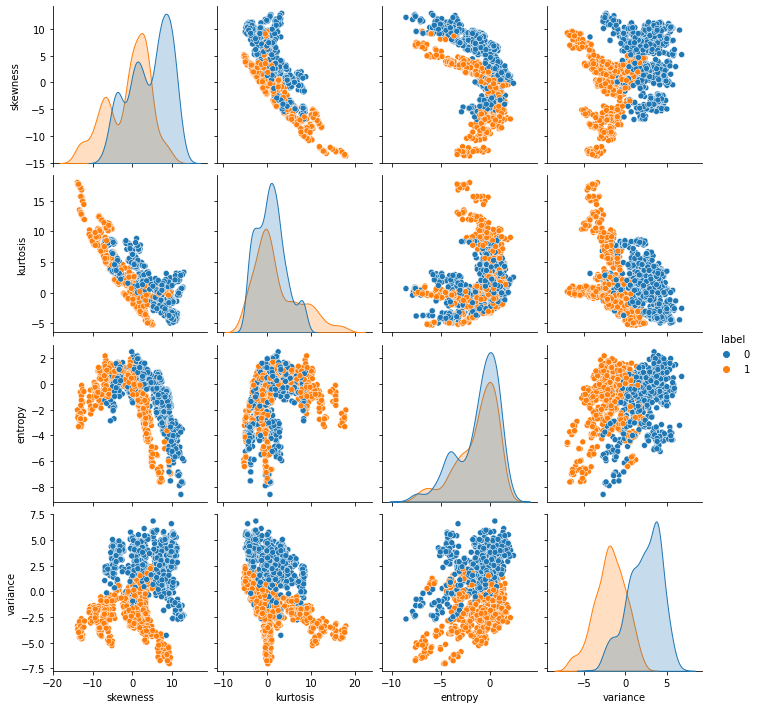

In [7]:
sns.pairplot(df[feature_names], hue='label')

## Classifiers

Initialize the logistic regression, decision tree, k-nearest neighbors, naive Bayes, and support vector machine classifiers.

In [18]:
X_train, X_test, y_train, y_test = train_test_split(df[feature_names], df['label'], test_size=0.25)

classifiers = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    KNeighborsClassifier(n_neighbors=1),
    GaussianNB(),
    svm.SVC()
]

## Predictions

Train the model, make predictions from the test set, and evaluate the performance of each classifier.

In [19]:
for classifier in classifiers:
    
    # Fit the classifier
    print(classifier)
    classifier.fit(X_train, y_train)

    # Make predictions and measure performance
    predictions = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    print(f"    Accuracy: {accuracy * 100:.1f}%")

    # Sensitivity and specificity
    tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    print(f"    Sensitivity: {sensitivity * 100:.1f}%")
    print(f"    Specificity: {specificity * 100:.1f}%")

LogisticRegression()
    Accuracy: 100.0%
    Sensitivity: 100.0%
    Specificity: 100.0%
DecisionTreeClassifier()
    Accuracy: 100.0%
    Sensitivity: 100.0%
    Specificity: 100.0%
KNeighborsClassifier(n_neighbors=1)
    Accuracy: 99.7%
    Sensitivity: 100.0%
    Specificity: 99.5%
GaussianNB()
    Accuracy: 100.0%
    Sensitivity: 100.0%
    Specificity: 100.0%
SVC()
    Accuracy: 100.0%
    Sensitivity: 100.0%
    Specificity: 100.0%


<br>

## Code authorship

2021 © Jessan Rendell G. Belenzo

## Terms of use

Licensed under the GNU General Public License v3.0. See [LICENSE](https://github.com/jessanrendell/banknote-authorization/blob/main/LICENSE).

<br>

### Data set

Gillich, E., & Lohweg, V. (2010). *Banknote Authentication*. 1. Jahreskolloquium Bild. Der Autom, 1-8.  
Dua, D. and Graff, C. (2019). [*UCI Machine Learning Repository*](http://archive.ics.uci.edu/ml). Irvine, CA: University of California, School of Information and Computer Science. 